In [9]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\imlou\AppData\Local\Temp\ipykernel_4876\2489168254.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genre_encoded'] = y_encoded


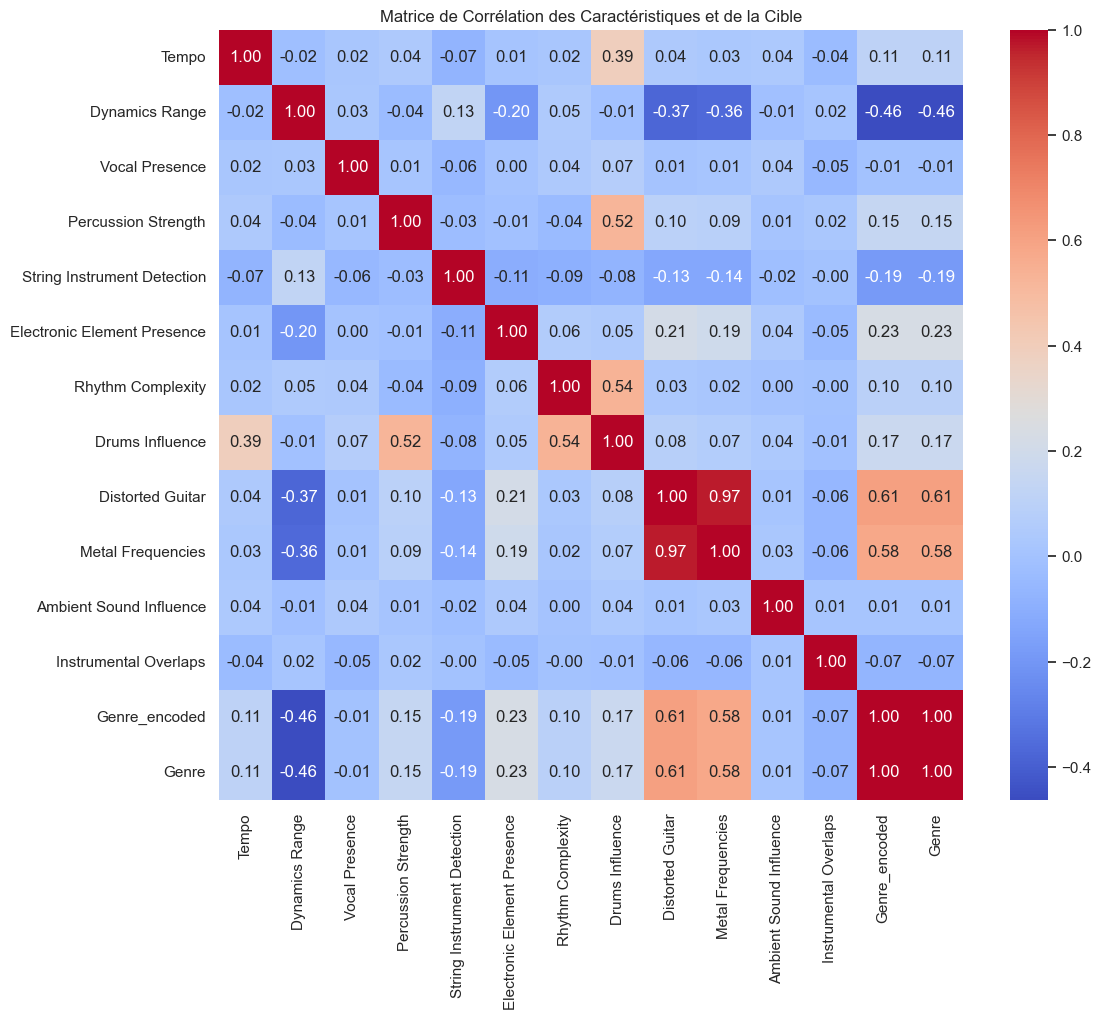

In [10]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Configurer Seaborn pour la visualisation
sns.set()

# Charger les données
df = pd.read_csv("music_dataset_mod.csv")  # Remplacez par le chemin vers votre fichier

# 1. Préparation des Données : Créer une copie du DataFrame et retirer les valeurs nulles dans la colonne Genre
df_cleaned = df.dropna(subset=['Genre'])

# 2. Diviser les Données : Séparer les caractéristiques (X) et la cible (y)
X = df_cleaned.drop(columns=['Genre'])
y = df_cleaned['Genre']

# 3. Encoder la Cible : Transformer la colonne Genre en valeurs numériques
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Ajouter la colonne encodée au DataFrame
df_cleaned['Genre_encoded'] = y_encoded

# 4. Mettre à Jour le DataFrame : Créer une copie mise à jour avec Genre encodé
df_corr = df_cleaned.drop(columns=['Genre']).copy()
df_corr['Genre'] = y_encoded

# 5. Générer la Matrice de Corrélation et la Carte Thermique
correlation_matrix = df_corr.corr()

# Visualiser la matrice de corrélation comme une carte thermique
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation des Caractéristiques et de la Cible")
plt.show()


C:\Users\imlou\AppData\Local\Temp\ipykernel_4876\1185652280.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = le.fit_transform(df_cleaned[column])


Tempo                          float64
Dynamics Range                 float64
Vocal Presence                 float64
Percussion Strength            float64
String Instrument Detection    float64
Electronic Element Presence    float64
Rhythm Complexity              float64
Drums Influence                float64
Distorted Guitar               float64
Metal Frequencies              float64
Ambient Sound Influence        float64
Instrumental Overlaps          float64
Genre                            int32
dtype: object


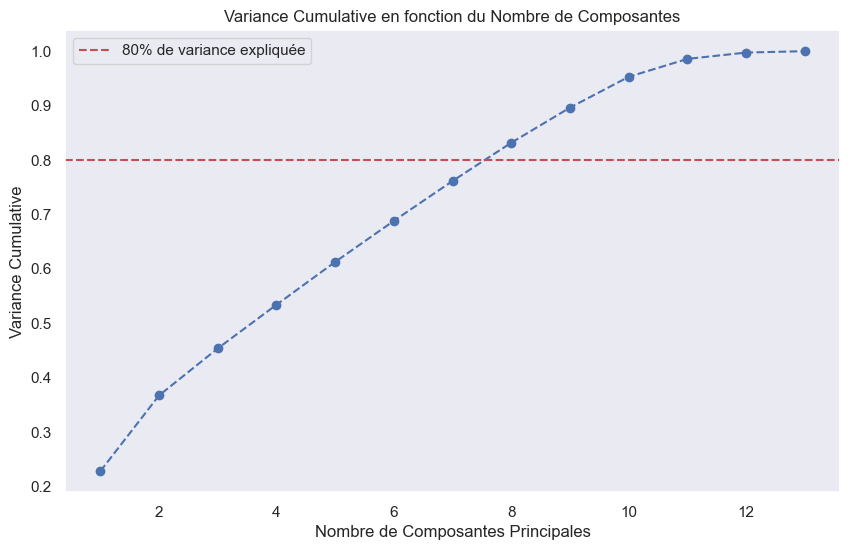

Nombre optimal de composantes pour capturer au moins 80% de la variance : 8
Variance expliquée par chaque composante (optimal): [0.22751256 0.13929128 0.08651157 0.08030889 0.07880914 0.07554367
 0.07338499 0.07027911]
Variance cumulative avec 8 composantes : 0.8316412059987427


In [16]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Charger les données
df = pd.read_csv("music_dataset_mod.csv")  # Remplacez par le chemin vers votre fichier

# Préparation des données : Nettoyer les valeurs nulles
df_cleaned = df.dropna()

# Encoder les variables catégorielles
for column in df_cleaned.select_dtypes(include=['object']).columns:
    # Appliquer LabelEncoder pour chaque colonne de type 'object'
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

# Vérifier que toutes les colonnes sont bien numériques
print(df_cleaned.dtypes)  # Toutes les colonnes doivent maintenant être de type numérique

# Standardiser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Appliquer PCA sans spécifier le nombre de composantes
pca = PCA()
pca_data = pca.fit_transform(df_scaled)

# Analyser la variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Visualiser la variance cumulative
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.8, color='r', linestyle='--', label="80% de variance expliquée")
plt.title("Variance Cumulative en fonction du Nombre de Composantes")
plt.xlabel("Nombre de Composantes Principales")
plt.ylabel("Variance Cumulative")
plt.legend()
plt.grid()
plt.show()

# Déterminer le nombre de composantes nécessaires pour capturer au moins 80% de la variance
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Nombre optimal de composantes pour capturer au moins 80% de la variance : {n_components}")

# Réappliquer le PCA avec le nombre optimal de composantes
pca_optimal = PCA(n_components=n_components)
df_pca = pca_optimal.fit_transform(df_scaled)

# Afficher les résultats finaux
print("Variance expliquée par chaque composante (optimal):", pca_optimal.explained_variance_ratio_)
print("Variance cumulative avec", n_components, "composantes :", cumulative_variance[n_components - 1])


In [17]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Charger les données
df = pd.read_csv("music_dataset_mod.csv")  # Remplacez par le chemin vers votre fichier

# Préparer les données : Nettoyer les valeurs nulles
df_cleaned = df.dropna()

# Encoder les variables catégorielles
label_encoder = LabelEncoder()
df_cleaned['Genre'] = label_encoder.fit_transform(df_cleaned['Genre'])

# Séparer les données en X (features) et y (cible)
X = df_cleaned.drop(columns=['Genre'])
y = df_cleaned['Genre']

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer PCA pour obtenir le nombre optimal de composantes
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculer la variance cumulée pour déterminer le nombre de composants nécessaires pour capturer au moins 80% de la variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
n_components = (cumulative_variance >= 0.8).argmax() + 1
print(f"Nombre de composantes principales pour capturer 80% de la variance : {n_components}")

# Réappliquer PCA avec le nombre optimal de composantes
pca = PCA(n_components=n_components)
X_pca_optimal = pca.fit_transform(X_scaled)

# Diviser les données pour le modèle PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_optimal, y, test_size=0.3, random_state=42)

# Diviser les données pour le modèle sans PCA
X_train, X_test, _, _ = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modèle 1 : Régression Logistique avec les données PCA
log_reg_pca = LogisticRegression(max_iter=10000, random_state=42)
log_reg_pca.fit(X_train_pca, y_train)

# Prédiction et évaluation avec les données PCA
y_pred_pca = log_reg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
classification_report_pca = classification_report(y_test, y_pred_pca)
print("Précision du modèle avec PCA :", accuracy_pca)
print("Rapport de classification avec PCA :\n", classification_report_pca)

# Modèle 2 : Régression Logistique avec les données originales
log_reg_original = LogisticRegression(max_iter=10000, random_state=42)
log_reg_original.fit(X_train, y_train)

# Prédiction et évaluation avec les données originales
y_pred_original = log_reg_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
classification_report_original = classification_report(y_test, y_pred_original)
print("Précision du modèle sans PCA :", accuracy_original)
print("Rapport de classification sans PCA :\n", classification_report_original)

# Comparaison des performances
print("\nComparaison des performances:")
print(f"Précision avec PCA : {accuracy_pca}")
print(f"Précision sans PCA : {accuracy_original}")


C:\Users\imlou\AppData\Local\Temp\ipykernel_4876\4180220989.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genre'] = label_encoder.fit_transform(df_cleaned['Genre'])


Nombre de composantes principales pour capturer 80% de la variance : 8
Précision du modèle avec PCA : 0.5355805243445693
Rapport de classification avec PCA :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267

Précision du modèle sans PCA : 0.5318352059925093
Rapport de classification sans PCA :
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       0.33      0.25      0.29        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41    

In [19]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Charger les données originales
df = pd.read_csv("music_dataset_mod.csv")  # Remplacez par le chemin vers votre fichier

# Encoder les variables catégorielles
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'].fillna('Unknown'))  # Remplir les NA avec une étiquette temporaire

# Isoler les données avec un genre inconnu
unknown_genre_df = df[df['Genre'] == label_encoder.transform(['Unknown'])[0]]  # Transformer 'Unknown' pour filtrer

# Vérifier si le DataFrame est vide
if not unknown_genre_df.empty:
    # Préparer les données pour la prédiction
    X_unknown = unknown_genre_df.drop(columns=['Genre'])

    # Standardiser les données
    scaler = StandardScaler()
    X_unknown_scaled = scaler.fit_transform(X_unknown)

    # Si vous avez utilisé PCA dans le modèle efficace, appliquez PCA ici
    # Assurez-vous que 'pca' est le modèle PCA que vous avez utilisé précédemment
    X_unknown_pca = pca.transform(X_unknown_scaled)

    # Prédire les genres inconnus en utilisant le modèle le plus efficace
    # Supposons que log_reg_pca est le modèle entraîné avec PCA
    predicted_genres = log_reg_pca.predict(X_unknown_pca)

    # Transformer les prédictions en étiquettes originales
    predicted_genres_labels = label_encoder.inverse_transform(predicted_genres)

    # Mettre à jour le DataFrame original
    df.loc[df['Genre'] == label_encoder.transform(['Unknown'])[0], 'Genre'] = predicted_genres_labels

    # Consulter les données mises à jour
    print("Données mises à jour avec les genres prédits :")
    print(df[df['Genre'] == label_encoder.transform(['Unknown'])[0]])  # Vérifier les lignes mises à jour
else:
    print("Aucune donnée avec genre inconnu à prédire.")


Données mises à jour avec les genres prédits :
Empty DataFrame
Columns: [Tempo, Dynamics Range, Vocal Presence, Percussion Strength, String Instrument Detection, Electronic Element Presence, Rhythm Complexity, Drums Influence, Distorted Guitar, Metal Frequencies, Ambient Sound Influence, Instrumental Overlaps, Genre]
Index: []


C:\Users\imlou\AppData\Local\Temp\ipykernel_4876\636334394.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Classical' 'Country' 'Country' 'Hip-hop' 'Rock' 'Jazz' 'Jazz' 'Jazz'
 'Rock' 'Jazz' 'Jazz' 'Hip-hop' 'Rock' 'Jazz' 'Rock' 'Country' 'Rock'
 'Jazz' 'Hip-hop' 'Rock' 'Hip-hop' 'Rock' 'Classical' 'Jazz' 'Country'
 'Jazz' 'Classical' 'Hip-hop' 'Classical' 'Jazz' 'Classical' 'Country'
 'Jazz' 'Rock' 'Rock' 'Rock' 'Country' 'Classical' 'Hip-hop' 'Country'
 'Jazz' 'Classical' 'Classical' 'Country' 'Rock' 'Jazz' 'Hip-hop' 'Jazz'
 'Classical' 'Jazz' 'Country' 'Jazz' 'Classical' 'Country' 'Rock'
 'Country' 'Hip-hop' 'Rock' 'Hip-hop' 'Jazz' 'Hip-hop' 'Classical'
 'Classical' 'Classical' 'Country' 'Rock' 'Jazz' 'Classical' 'Country'
 'Jazz' 'Jazz' 'Country' 'Jazz' 'Rock' 'Classical' 'Rock' 'Hip-hop' 'Jazz'
 'Country' 'Country' 'Hip-hop' 'Classical' 'Rock' 'Classical' 'Classical'
 'Rock' 'Classical' 'Coun